# **#Smart Travel Package Recommender**
This Python script develops three machine learning models to predict:

1️⃣ Flight Price using XGBoost

2️⃣ Hotel Price using LightGBM

3️⃣ Customer Experience Score using LightGBM

RMSE (Root Mean Squared Error) to measure prediction error

R² (Coefficient of Determination) to assess model performance





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/Internship Project/Smart_Traveller_Package_Recommend /final_data.csv")
df.head()

,customer_id,email,phone_number,Date_of_Journey,departure_time,arrival_time,Departure,Destination,departure_airport,arrival_airport,...,age,gender,booking_source,special_requests,previous_booking_count,season,days_until_travel,average_ticket_price_last_30_days,average_hotel_price_last_30_days,dynamic_pricing_suggestion
0,636354,user636354@example.com,+1-364-7883,2024-02-11,7:10 PM,12:35 PM,Houston,New York,IAH,JFK,...,45,Female,Website,Extra Pillow,0,Autumn,85,778.69,485.55,Keep Stable
1,508907,user508907@example.com,+1-739-8336,2024-11-08,5:20 PM,3:04 AM,Los Angeles,Chicago,LAX,ORD,...,20,Male,Website,Late Check-in,4,Autumn,23,1208.16,419.56,Keep Stable
2,345754,user345754@example.com,+1-499-2619,2024-07-09,9:51 PM,4:14 AM,Miami,Houston,MIA,IAH,...,62,Female,Travel Agent,Vegetarian Meal,10,Spring,74,296.13,113.47,Keep Stable
3,628555,user628555@example.com,+1-406-1626,2024-06-08,10:08 PM,8:18 AM,Dubai,Sydney,DXB,SYD,...,50,Female,Website,Late Check-in,1,Summer,58,589.82,365.14,Increase Price
4,687849,user687849@example.com,+1-202-9294,2024-06-13,1:04 PM,1:00 AM,Chicago,Paris,ORD,CDG,...,25,Male,Walk-in,Vegetarian Meal,0,Summer,180,471.41,419.71,Keep Stable



# **- Data Preprocessing**



In [ ]:
df.columns

Index(['customer_id', 'email', 'phone_number', 'Date_of_Journey',
       'departure_time', 'arrival_time', 'Departure', 'Destination',
       'departure_airport', 'arrival_airport', 'hotel_check_in_date',
       'hotel_check_out_date', 'hotel_country', 'ticket_price', 'hotel_price',
       'total_spent', 'flight_class', 'room_type', 'payment_method',
       'customer_name', 'age', 'gender', 'booking_source', 'special_requests',
       'previous_booking_count', 'season', 'days_until_travel',
       'average_ticket_price_last_30_days', 'average_hotel_price_last_30_days',
       'dynamic_pricing_suggestion'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        50000 non-null  int64  
 1   email                              50000 non-null  object 
 2   phone_number                       50000 non-null  object 
 3   Date_of_Journey                    50000 non-null  object 
 4   departure_time                     50000 non-null  object 
 5   arrival_time                       50000 non-null  object 
 6   Departure                          50000 non-null  object 
 7   Destination                        50000 non-null  object 
 8   departure_airport                  50000 non-null  object 
 9   arrival_airport                    50000 non-null  object 
 10  hotel_check_in_date                50000 non-null  object 
 11  hotel_check_out_date               50000 non-null  obj

In [ ]:
df.isnull().sum()

,0
customer_id,0
email,0
phone_number,0
Date_of_Journey,0
departure_time,0
arrival_time,0
Departure,0
Destination,0
departure_airport,0
arrival_airport,0


In [ ]:
df.fillna(method='ffill', inplace=True)

<ipython-input-58-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
df.isnull().sum()

,0
customer_id,0
email,0
phone_number,0
Date_of_Journey,0
departure_time,0
arrival_time,0
Departure,0
Destination,0
departure_airport,0
arrival_airport,0


In [ ]:
df=df.drop(['customer_id','email','phone_number'],axis=1)
df.head()

,Date_of_Journey,departure_time,arrival_time,Departure,Destination,departure_airport,arrival_airport,hotel_check_in_date,hotel_check_out_date,hotel_country,...,age,gender,booking_source,special_requests,previous_booking_count,season,days_until_travel,average_ticket_price_last_30_days,average_hotel_price_last_30_days,dynamic_pricing_suggestion
0,2024-02-11,7:10 PM,12:35 PM,Houston,New York,IAH,JFK,2024-02-11,2024-02-13,USA,...,45,Female,Website,Extra Pillow,0,Autumn,85,778.69,485.55,Keep Stable
1,2024-11-08,5:20 PM,3:04 AM,Los Angeles,Chicago,LAX,ORD,2024-11-08,2024-11-09,USA,...,20,Male,Website,Late Check-in,4,Autumn,23,1208.16,419.56,Keep Stable
2,2024-07-09,9:51 PM,4:14 AM,Miami,Houston,MIA,IAH,2024-07-09,2024-07-12,USA,...,62,Female,Travel Agent,Vegetarian Meal,10,Spring,74,296.13,113.47,Keep Stable
3,2024-06-08,10:08 PM,8:18 AM,Dubai,Sydney,DXB,SYD,2024-06-08,2024-06-12,Australia,...,50,Female,Website,Late Check-in,1,Summer,58,589.82,365.14,Increase Price
4,2024-06-13,1:04 PM,1:00 AM,Chicago,Paris,ORD,CDG,2024-06-13,2024-06-14,France,...,25,Male,Walk-in,Vegetarian Meal,0,Summer,180,471.41,419.71,Keep Stable


In [ ]:
df.duplicated().sum()

0

In [ ]:
#indetifying garbge value
for i in df.select_dtypes(include=['object']).columns:
    print(i)
    print(df[i].value_counts())
    print("****"*10)

Date_of_Journey
Date_of_Journey
2024-07-11    170
2024-09-14    168
2024-12-21    167
2024-05-23    166
2024-04-11    165
             ... 
2024-03-12    113
2024-05-13    112
2024-04-09    112
2024-07-06    112
2024-04-08    107
Name: count, Length: 367, dtype: int64
****************************************
departure_time
departure_time
2:38 AM    55
3:20 AM    54
4:02 AM    54
1:35 PM    52
1:41 PM    51
           ..
7:51 PM    18
8:38 PM    17
8:55 AM    17
1:52 PM    17
7:35 PM    17
Name: count, Length: 1440, dtype: int64
****************************************
arrival_time
arrival_time
10:12 AM    56
9:10 PM     55
11:49 AM    52
2:14 PM     52
4:30 PM     52
            ..
10:27 AM    19
5:24 AM     17
2:00 PM     17
12:03 PM    15
3:09 AM     14
Name: count, Length: 1440, dtype: int64
****************************************
Departure
Departure
Houston        5074
Dubai          5053
Chicago        5023
Los Angeles    5015
New York       5001
Tokyo          4995
London       

# **- Exploratory Data Analysis.**

In [ ]:
df.describe()

,ticket_price,hotel_price,total_spent,age,previous_booking_count,days_until_travel,average_ticket_price_last_30_days,average_hotel_price_last_30_days
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,852.749335,275.259027,1128.008363,43.94208,5.006880,90.301680,850.720576,274.991759
std,375.317254,129.626395,396.763853,15.29845,3.163029,51.780677,374.717608,129.996889
min,200.010000,50.030000,256.330000,18.00000,0.000000,1.000000,200.050000,50.020000
25%,526.610000,163.030000,802.705000,31.00000,2.000000,46.000000,527.150000,163.205000
50%,856.340000,276.195000,1129.965000,44.00000,5.000000,90.000000,850.130000,274.890000
75%,1178.405000,386.882500,1452.547500,57.00000,8.000000,135.000000,1173.382500,387.512500
max,1499.920000,499.990000,1998.180000,70.00000,10.000000,180.000000,1499.990000,499.990000


In [ ]:
df.describe(include='object')

,Date_of_Journey,departure_time,arrival_time,Departure,Destination,departure_airport,arrival_airport,hotel_check_in_date,hotel_check_out_date,hotel_country,flight_class,room_type,payment_method,customer_name,gender,booking_source,special_requests,season,dynamic_pricing_suggestion
count,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,367,1440,1440,10,10,10,10,367,371,6,3,3,3,48586,2,4,3,4,3
top,2024-07-11,2:38 AM,10:12 AM,Houston,New York,IAH,JFK,2024-07-11,2024-06-25,USA,Business,Suite,PayPal,User123323,Male,Mobile App,Vegetarian Meal,Summer,Keep Stable
freq,170,55,56,5074,5075,5074,5075,170,175,25140,16837,16805,16686,4,25051,12669,16821,12591,16743


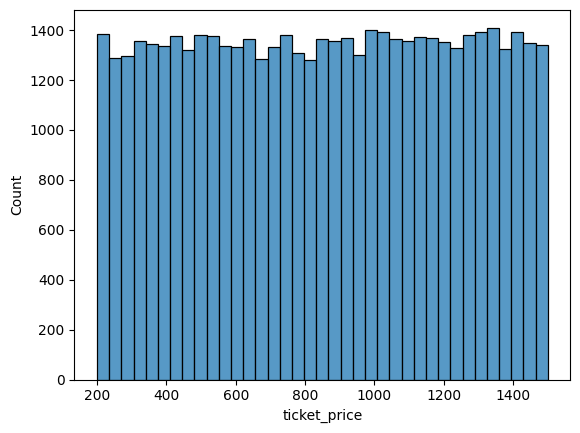

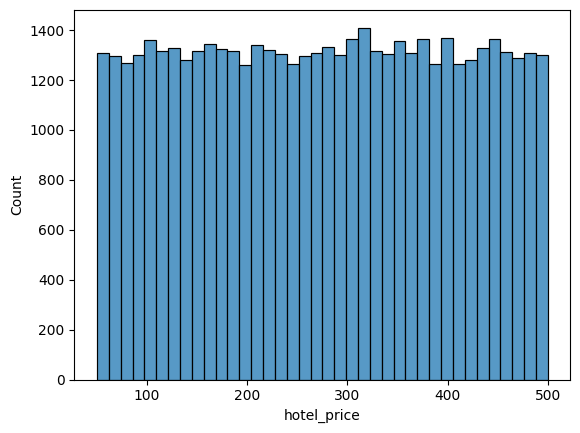

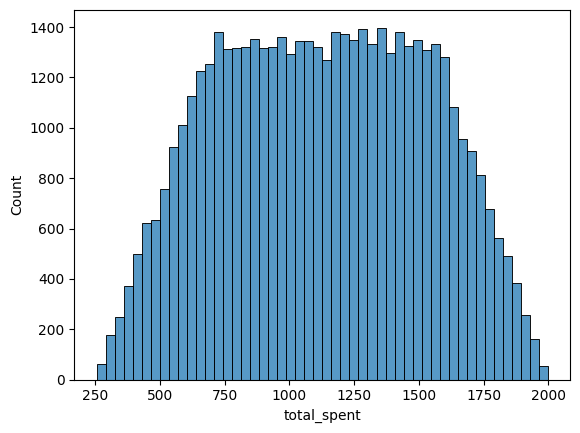

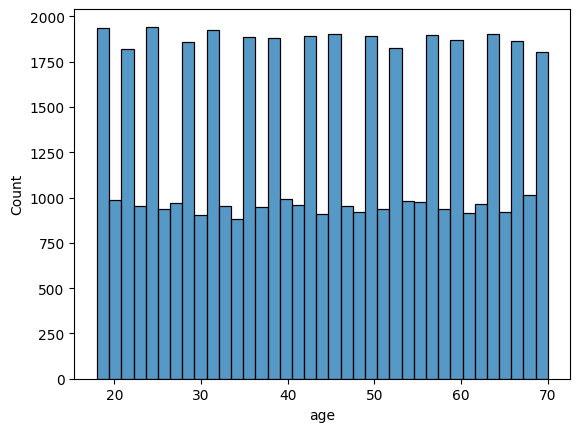

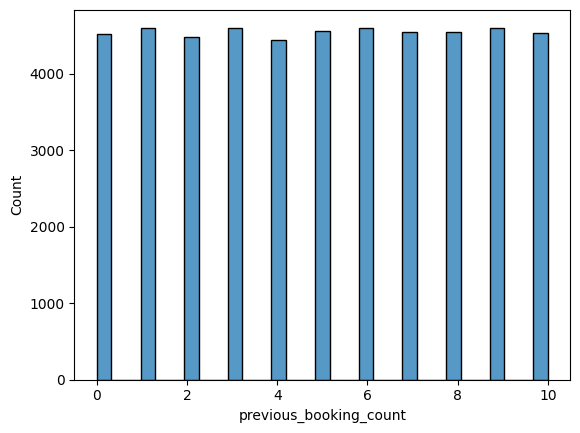

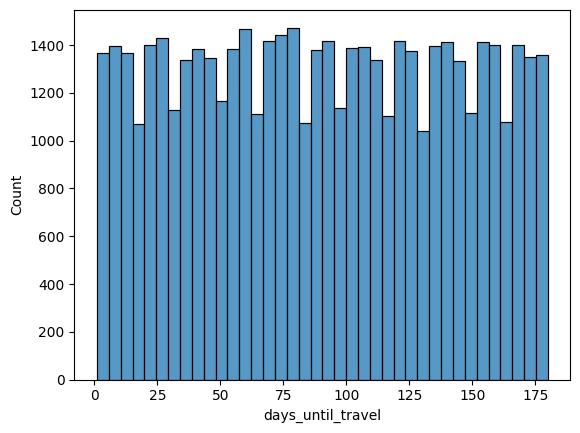

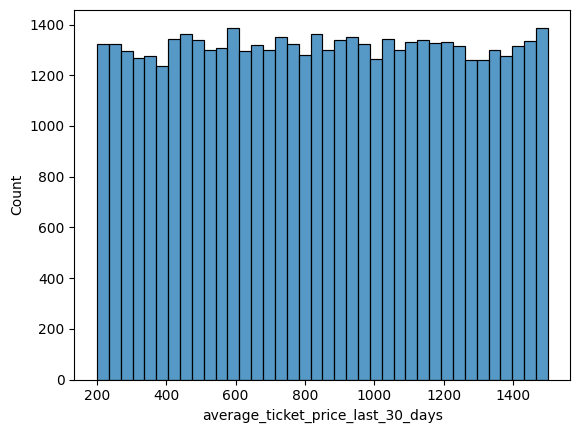

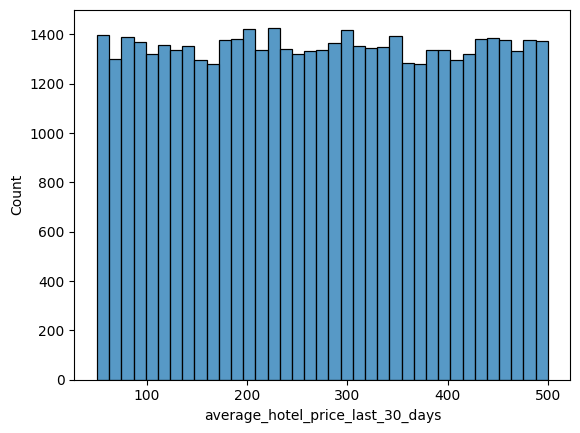

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in df.select_dtypes(include=['number']).columns:
  sns.histplot(data=df,x=i)
  plt.show()

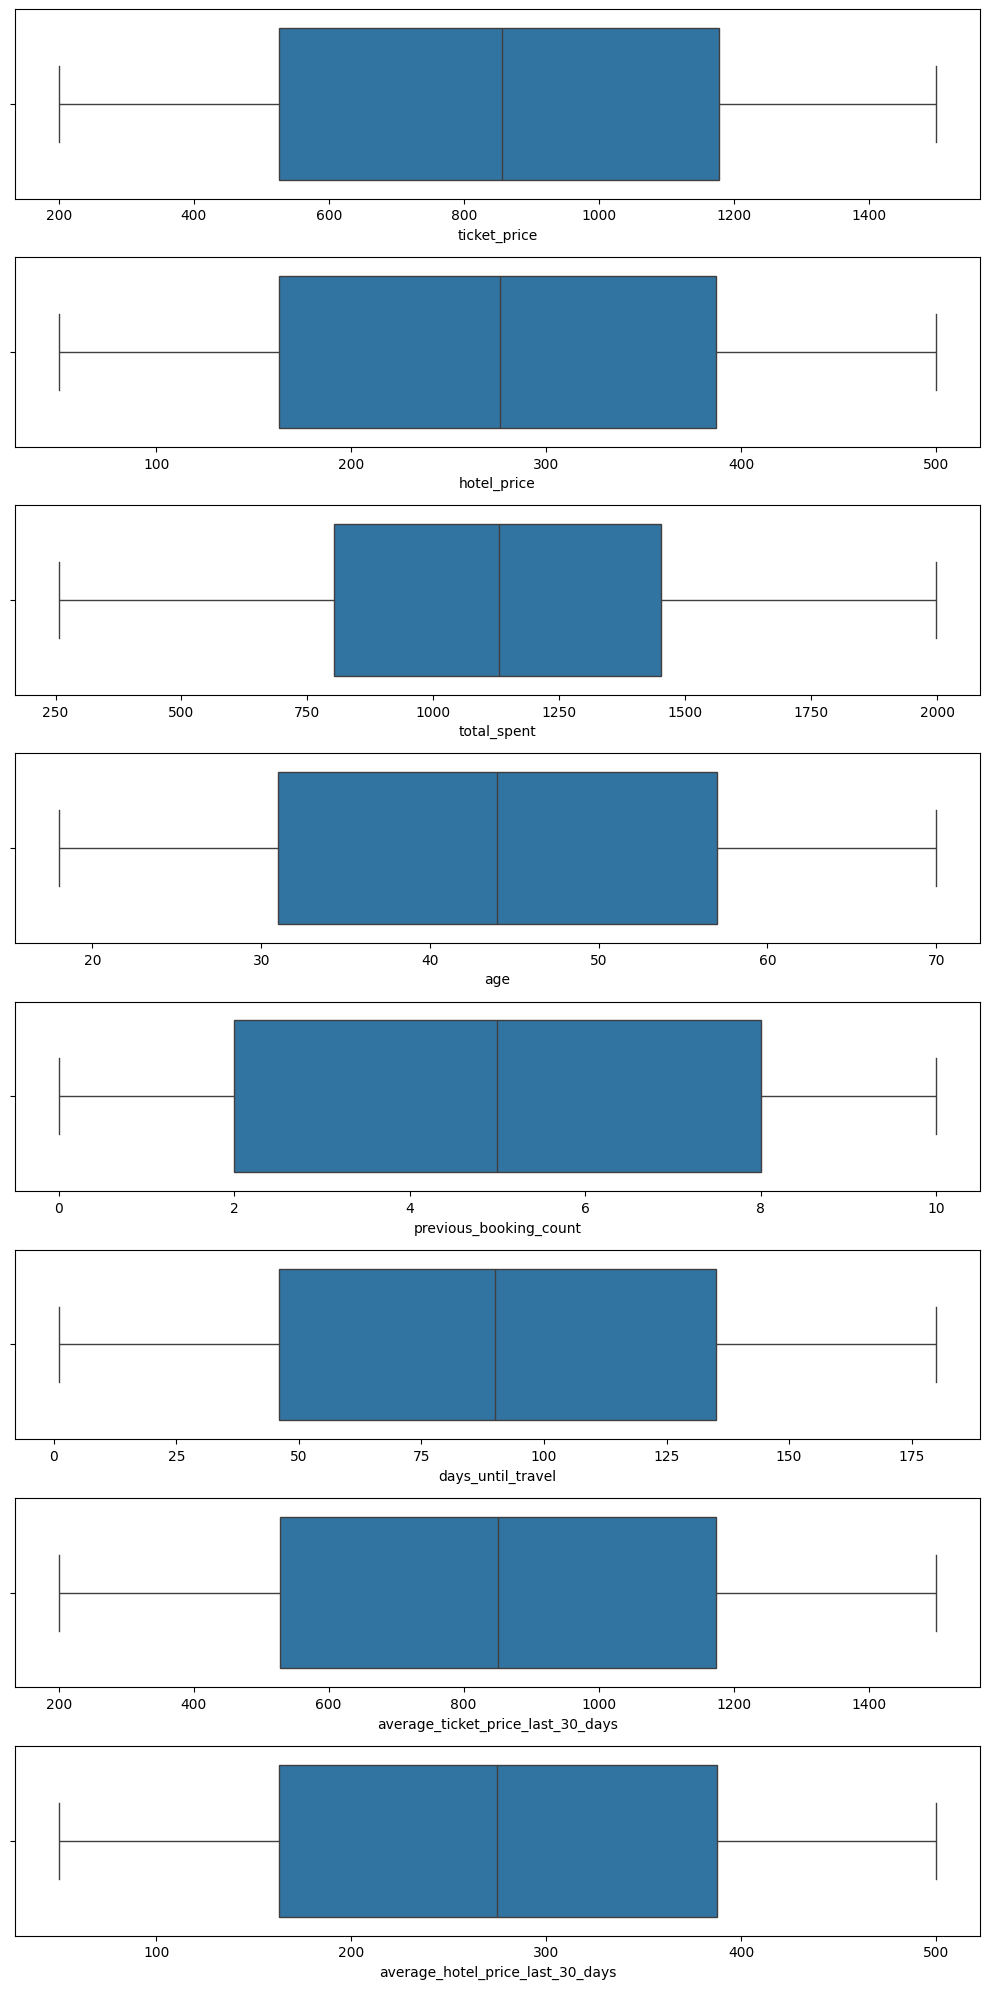

In [ ]:
fig, axes = plt.subplots(len(df.select_dtypes(include=['number']).columns), 1, figsize=(10, 20)) # Create a figure with subplots
# Iterate through numerical columns and create boxplots on subplots
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    sns.boxplot(data=df, x=col, ax=axes[i]) # Plot on a specific subplot

plt.tight_layout() # Adjust layout for better spacing
plt.show() # Display all boxplots in a single figure

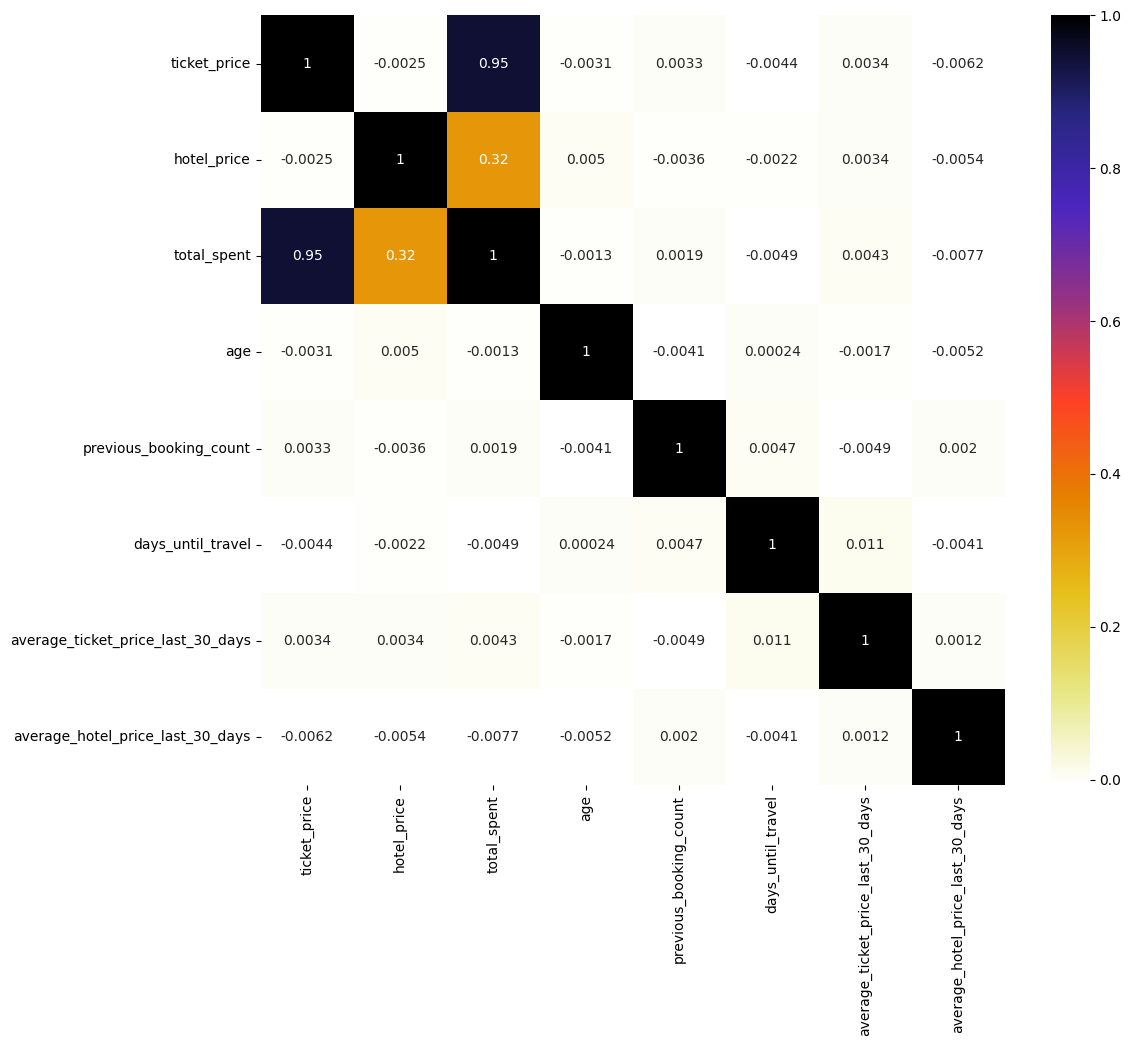

In [ ]:
plt.figure(figsize=(12,10))
cor = df.select_dtypes(include=['number']).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# Convert date and time columns to datetime format
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%I:%M %p', errors='coerce')
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%I:%M %p', errors='coerce')
df['hotel_check_in_date'] = pd.to_datetime(df['hotel_check_in_date'], errors='coerce')
df['hotel_check_out_date'] = pd.to_datetime(df['hotel_check_out_date'], errors='coerce')

In [ ]:
# Calculate flight duration (handling overnight flights)
df['flight_duration'] = (df['arrival_time'] - df['departure_time']).dt.total_seconds() / 3600
#The following line is modified to assign the result of the apply function to the new column 'flight_duration' within the dataframe
df['flight_duration'] = df['flight_duration'].apply(lambda x: x + 24 if x < 0 else x)  # Adjust for overnight flights

In [ ]:
# Calculate stay duration in days
df['stay_duration'] = (df['hotel_check_out_date'] - df['hotel_check_in_date']).dt.days

In [ ]:
# Group airports by size (Example: Small, Medium, Large)
large_airports = {'JFK', 'LAX', 'ORD', 'ATL', 'DXB', 'CDG', 'LHR'}
medium_airports = {'IAH', 'MIA', 'SYD', 'SIN', 'BOM', 'HND'}

df['departure_airport_size'] = df['departure_airport'].apply(lambda x: 'Large' if x in large_airports else ('Medium' if x in medium_airports else 'Small'))
df['arrival_airport_size'] = df['arrival_airport'].apply(lambda x: 'Large' if x in large_airports else ('Medium' if x in medium_airports else 'Small'))

In [ ]:
# Encode hotel countries by region (simplified example)
region_mapping = {
    'USA': 'North America', 'Canada': 'North America', 'Mexico': 'North America',
    'France': 'Europe', 'Germany': 'Europe', 'UK': 'Europe',
    'India': 'Asia', 'Japan': 'Asia', 'China': 'Asia',
    'Australia': 'Oceania', 'New Zealand': 'Oceania'
}

df['hotel_region'] = df['hotel_country'].map(region_mapping).fillna('Other')

In [ ]:
# Drop irrelevant columns
drop_cols = ['customer_name', 'Date_of_Journey','departure_time', 'arrival_time', 'hotel_check_in_date', 'hotel_check_out_date']
df_clean = df.drop(columns=drop_cols)

In [ ]:
# Encode categorical variables
categorical_cols = df_clean.select_dtypes(include=['object']).columns
label_encoders = {}

from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le


# **Model Training**

In [ ]:
pip install xgboost


In [ ]:
pip install catboost


In [ ]:
pip install lightgbm


In [ ]:
# Split data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Approach 1**

In [ ]:
# Define features and target variable
X = df_clean.drop(columns=['total_spent'])
y = df_clean['total_spent']

In [ ]:
# Initialize models
import xgboost as xgb  # Import xgboost library
import catboost as cb  # Import catboost library
import lightgbm as lgb # Import lightgbm library

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
cat_model = cb.CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE', verbose=0)
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train models
xgb_model.fit(X_train, y_train)
cat_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_cat = cat_model.predict(X_test)
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate models
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy for sqrt

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return f"{model_name} - RMSE: {rmse:.2f}, R²: {r2:.2f}"

results = [
    evaluate_model(y_test, y_pred_xgb, "XGBoost"),
    evaluate_model(y_test, y_pred_cat, "CatBoost"),
    evaluate_model(y_test, y_pred_lgb, "LightGBM")
]

results # Print the results

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1607
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 25
[LightGBM] [Info] Start training from score 1127.873975


['XGBoost - RMSE: 5.54, R²: 1.00',
 'CatBoost - RMSE: 6.86, R²: 1.00',
 'LightGBM - RMSE: 4.55, R²: 1.00']

# **Approach 2**

In [ ]:
#  Normalize important numerical features
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler
scaler = MinMaxScaler()
df_clean[['ticket_price', 'hotel_price', 'flight_duration', 'stay_duration']] = scaler.fit_transform(
    df_clean[['ticket_price', 'hotel_price', 'flight_duration', 'stay_duration']])

In [ ]:
# Compute Customer Experience Score (scale 0-10)
df_clean['customer_experience_score'] = (
    (1 - df_clean['ticket_price']) * 0.3 +  # Lower flight price -> better experience
    (1 - df_clean['hotel_price']) * 0.3 +   # Lower hotel price -> better experience
    (1 - df_clean['flight_duration']) * 0.2 +  # Shorter flights -> better experience
    (1 - abs(df_clean['stay_duration'] - 5) / 5) * 0.2  # Stay duration close to 5 days -> better experience
) * 10  # Scale to 0-10

df_clean['customer_experience_score'] = df_clean['customer_experience_score'].clip(0, 10)  # Ensure values between 0-10

In [ ]:
#  Define bins and labels
bins = [0, 4, 8, 10]  # Bins (ranges for classification)
labels = ['Worst', 'Average', 'Good']  # Corresponding labels

# Create a new column for categorized customer experience
df_clean['customer_experience_category'] = pd.cut(df_clean['customer_experience_score'], bins=bins, labels=labels, include_lowest=True)

# Display value counts to check distribution
print(df_clean['customer_experience_category'].value_counts())

customer_experience_category
Average    27656
Worst      22334
Good          10
Name: count, dtype: int64


In [ ]:
df_clean['customer_experience_category']

,customer_experience_category
0,Average
1,Worst
2,Average
3,Average
4,Worst
...,...
49995,Average
49996,Worst
49997,Average
49998,Average


In [ ]:
#  Define Features & Target
X = df_clean.drop(columns=['ticket_price', 'hotel_price', 'customer_experience_score','customer_experience_category'])
y = df_clean[['ticket_price', 'hotel_price', 'customer_experience_score']]

#  Split Data into Train & Test
from sklearn.model_selection import train_test_split # Import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Initialize Base Model
import lightgbm as lgb # Import lightgbm
base_model = lgb.LGBMRegressor()

#  Define Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 31, 40],
    'min_child_samples': [10, 20, 30]
}

#  Use RandomizedSearchCV for Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV # Import RandomizedSearchCV
random_search = RandomizedSearchCV(
    base_model, param_grid, n_iter=10, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2, random_state=42
)

# Fit MultiOutput Model
from sklearn.multioutput import MultiOutputRegressor # Import MultiOutputRegressor
multi_model = MultiOutputRegressor(random_search)
multi_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1351
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 24
[LightGBM] [Info] Start training from score 0.502278
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

MultiOutputRegressor(estimator=RandomizedSearchCV(cv=5,
                                                  estimator=LGBMRegressor(),
                                                  n_jobs=-1,
                                                  param_distributions={'learning_rate': [0.01,
                                                                                         0.05,
                                                                                         0.1],
                                                                       'max_depth': [3,
                                                                                     5,
                                                                                     7],
                                                                       'min_child_samples': [10,
                                                                                             20,
                                                                                             30],
                                                                       'n_estimators': [100,
                                                                                        200,
                                                                                        500],
                                                                       'num_leaves': [20,
                                                                                      31,
                                                                                      40]},
                                                  random_state=42,
                                                  scoring='neg_root_mean_squared_error',
                                                  verbose=2))

In [ ]:
# Make Predictions
y_pred = multi_model.predict(X_test)

In [ ]:
# Evaluate Model
def evaluate_multioutput(y_true, y_pred, model_name):
    scores = {}
    for i, col in enumerate(y_true.columns):
        rmse = np.sqrt(mean_squared_error(y_true.iloc[:, i], y_pred[:, i]))
        r2 = r2_score(y_true.iloc[:, i], y_pred[:, i])
        scores[col] = f"{model_name} - {col} - RMSE: {rmse:.2f}, R²: {r2:.2f}"
    return scores

In [ ]:
#  Print Results
results = evaluate_multioutput(y_test, y_pred, "MultiOutput LightGBM")
for res in results.values():
    print(res)

MultiOutput LightGBM - ticket_price - RMSE: 0.09, R²: 0.90
MultiOutput LightGBM - hotel_price - RMSE: 0.26, R²: 0.17
MultiOutput LightGBM - customer_experience_score - RMSE: 0.52, R²: 0.85


# **Approach 3**

In [ ]:
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Function to train and evaluate each model
def train_and_evaluate_model(X_train, X_test, y_train, y_test, model, param_grid, target_name):
    # Use RandomizedSearchCV for tuning
    random_search = RandomizedSearchCV(
        model, param_grid, n_iter=10, cv=5, scoring='neg_root_mean_squared_error',
        n_jobs=-1, verbose=1, random_state=42
    )

    # Fit the model
    random_search.fit(X_train, y_train)

    # Best model
    best_model = random_search.best_estimator_

    # Predict
    y_pred = best_model.predict(X_test)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"{target_name} - Best Model: {best_model}")
    print(f"{target_name} - RMSE: {rmse:.2f}, R²: {r2:.2f}\n")

    return best_model

# Define hyperparameter grids
param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

param_grid_lgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 31, 40]
}

# Ensure df_clean exists and contains necessary columns before proceeding
if 'flight_price' in df_clean.columns:
    X_flight = df_clean.drop(columns=['ticket_price'])
    y_flight = df_clean['ticket_price']
    X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_flight, y_flight, test_size=0.2, random_state=42)
    best_flight_model = train_and_evaluate_model(X_train_f, X_test_f, y_train_f, y_test_f, xgb.XGBRegressor(), param_grid_xgb, "Flight Price")

if 'hotel_price' in df_clean.columns:
    X_hotel = df_clean.drop(columns=['hotel_price'])
    y_hotel = df_clean['hotel_price']
    X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_hotel, y_hotel, test_size=0.2, random_state=42)
    best_hotel_model = train_and_evaluate_model(X_train_h, X_test_h, y_train_h, y_test_h, lgb.LGBMRegressor(), param_grid_lgb, "Hotel Price")

if 'customer_experience_score' in df_clean.columns:
    X_exp = df_clean.drop(columns=['customer_experience_score'])
    y_exp = df_clean['customer_experience_score']
    X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_exp, y_exp, test_size=0.2, random_state=42)
    best_exp_model = train_and_evaluate_model(X_train_e, X_test_e, y_train_e, y_test_e, lgb.LGBMRegressor(), param_grid_lgb, "Customer Experience")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1864
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 27
[LightGBM] [Info] Start training from score 0.499862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB